In [1]:
import numpy as np
import pandas as pd
dataset = pd.read_csv("Mall_Customers.csv")

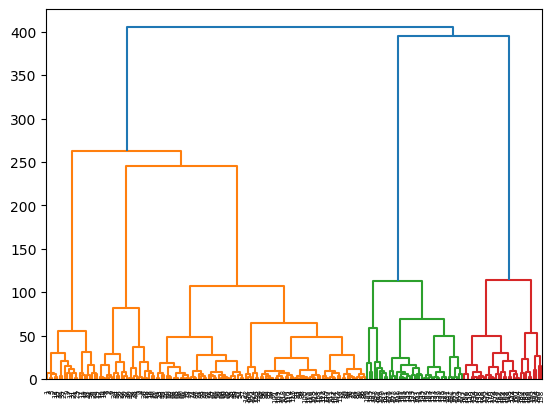

In [2]:
#clustering will be the output.. So NO y(output)
#find the no. of clusters using ward 
X= dataset.iloc[:, [3,4]].values # just taking AnnualIncome and Spending score input.. the rest are not related

    
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

#count the big wards 5
 

In [3]:
from sklearn.cluster import KMeans
# Recursive Divisive Clustering Function
#used by K-mean recursive 
def divisive_clustering(data, max_clusters):
    # Start with one cluster containing all data points
    clusters = [data]  
    cluster_labels = np.zeros(len(data))  # Initialize cluster labels

    # Initialize cluster number
    cluster_num = 0

    while len(clusters) < max_clusters:
        # Find the cluster to split (always split the largest)
        largest_cluster = max(clusters, key=len)  
        clusters.remove(largest_cluster)  # Remove it from the list

        # Apply K-Means to split the largest cluster into two
        kmeans = KMeans(n_clusters=2, random_state=42)
        labels = kmeans.fit_predict(largest_cluster)

        # Create two new clusters
        cluster1 = largest_cluster[labels == 0]
        cluster2 = largest_cluster[labels == 1]

        # Append new clusters to the list
        clusters.append(cluster1)
        clusters.append(cluster2)

        # Update cluster labels
        cluster_labels[np.isin(data, cluster1).all(axis=1)] = cluster_num
        cluster_num += 1

    return cluster_labels

# Run Divisive Clustering to create 5 clusters
labels = divisive_clustering(X, max_clusters=5)

C:\Users\mpriy\anaconda3\envs\aimlVirtualEnvironment\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


In [4]:
labels

array([2., 2., 0., 2., 2., 2., 0., 2., 0., 2., 0., 2., 2., 2., 0., 2., 0.,
       2., 2., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2.,
       0., 2., 2., 2., 0., 2., 0., 2., 0., 2., 2., 2., 3., 3., 3., 3., 3.,
       3., 3., 3., 2., 3., 2., 2., 2., 3., 3., 3., 3., 3., 2., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 2., 3., 3., 2., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 1., 3., 3., 3., 1., 0., 1., 0., 1., 3., 3., 0., 1.,
       0., 2., 0., 1., 0., 1., 3., 2., 0., 1., 3., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 3., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 2., 0., 2., 0., 1., 0., 1., 0., 1., 0., 1., 2., 1., 2., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.])

In [5]:
#add the category to a new field in the dataset
supervised = pd.DataFrame(dataset)
supervised['Cluster_group'] = labels
supervised.to_csv("cluster_divise.csv", index= False)

C:\Users\mpriy\anaconda3\envs\aimlVirtualEnvironment\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


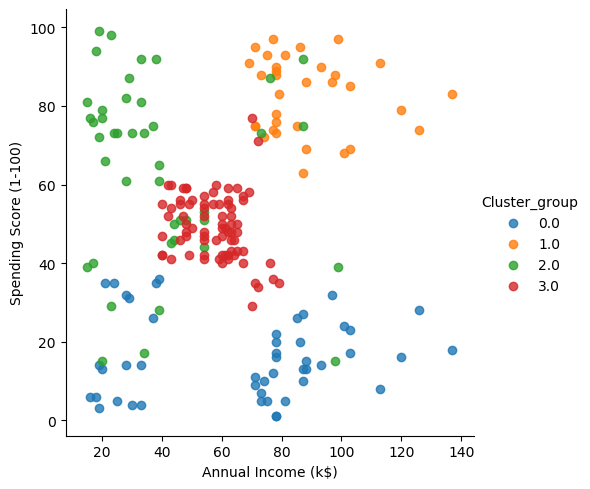

In [6]:
#plot the dataset to see its each value's cluster
import seaborn as sns
facet = sns.lmplot(data= supervised, x= supervised.columns[3], y = supervised.columns[4], hue= supervised.columns[5] ,
                  fit_reg=False, legend= True, legend_out= True)